In [33]:
## testing new data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
import sklearn
import math

In [5]:
# Import the parsing function from the separate file
from parse_pgn_games import create_games_csv

# Parse the PGN file and create CSV
pgn_path = 'Data/lichess_AuraChessTransformer_2026-01-22.pgn'
output_csv_path = 'Data/games_summary.csv'

games_df = create_games_csv(pgn_path, output_csv_path)
print(f"\n✓ Saved game summary to: {output_csv_path}")


# Display summary
print(f"Total games parsed: {len(games_df)}")


print("Games DATASET OVERVIEW:")
print(f"\nShape: {games_df.shape[0]:,} rows × {games_df.shape[1]} columns")

# Display column types and non-null counts
print(games_df.info())

# TODO: Load CSV from Data/results_full.csv
# - Use pandas read_csv()
# - Store in variable: df
print("FIRST 5 ROWS:")
display(games_df.head())  # Use display() for better Jupyter rendering


✓ Saved game summary to: Data/games_summary.csv
Total games parsed: 453
Games DATASET OVERVIEW:

Shape: 453 rows × 18 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            453 non-null    object
 1   date               453 non-null    object
 2   utc_date           453 non-null    object
 3   utc_time           453 non-null    object
 4   white_player       453 non-null    object
 5   black_player       453 non-null    object
 6   white_elo          453 non-null    object
 7   black_elo          453 non-null    object
 8   white_rating_diff  453 non-null    object
 9   black_rating_diff  453 non-null    object
 10  result             453 non-null    object
 11  winner             453 non-null    object
 12  num_moves          453 non-null    int64 
 13  time_control       453 non-null    object
 14  eco        

,game_id,date,utc_date,utc_time,white_player,black_player,white_elo,black_elo,white_rating_diff,black_rating_diff,result,winner,num_moves,time_control,eco,termination,variant,site
0,euTIepDn,2025.11.11,2025.11.11,15:16:08,AuraChessTransformer,AuraChessCNN,1584,1519,-1,+1,1/2-1/2,Draw,50,180+2,A46,Normal,Standard,https://lichess.org/euTIepDn
1,qLtehhxd,2025.11.11,2025.11.11,15:15:46,AuraChessCNN,AuraChessTransformer,1512,1591,+7,-7,1-0,AuraChessCNN,30,180+2,B06,Normal,Standard,https://lichess.org/qLtehhxd
2,yUmq5927,2025.11.11,2025.11.11,15:15:04,AuraChessTransformer,AuraChessCNN,1593,1511,-2,+1,1/2-1/2,Draw,61,180+2,D27,Normal,Standard,https://lichess.org/yUmq5927
3,0FEHbp3I,2025.11.11,2025.11.11,15:14:30,AuraChessTransformer,AuraChessCNN,1588,1515,+5,-4,1-0,AuraChessTransformer,51,180+2,E94,Normal,Standard,https://lichess.org/0FEHbp3I
4,8dccm5I4,2025.11.11,2025.11.11,15:13:55,AuraChessCNN,AuraChessTransformer,1520,1583,-5,+5,0-1,AuraChessTransformer,48,180+2,B88,Normal,Standard,https://lichess.org/8dccm5I4


In [ ]:
# loading new data

raw_df = pd.read_csv('Data/results_first_move.csv')

# display first 5 rows
print(raw_df.head())

# display info
print(raw_df.info())

  PuzzleId                                                FEN  \
0    00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1    0000D  5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...   
2    0008Q       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
3    0009B  r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...   
4    000Pw  6k1/5p1p/4p3/4q3/3nN3/2Q3P1/PP3P1P/6K1 w - - 2 37   

                           Moves  Rating  RatingDeviation  Popularity  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1    1877               76          95   
1            d3d6 f8d8 d6d8 f6d8    1501               73          96   
2            e7f7 f5e5 e2f1 e5e6    1355               76          91   
3            b6c5 e2g4 h3g4 d1g4    1103               74          88   
4            e4d2 d4e2 g1f1 e2c3    1422               74          92   

   NbPlays                                 Themes  \
0     8786  crushing hangingPiece long middlegame   
1    35000                advantage endgame short   
2      743 

In [7]:
display(raw_df.head())



,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,cnn_first_move_correct,transformer_first_move_correct,cnn_first_move_top5_correct,transformer_first_move_top5_correct,cnn_first_move,transformer_first_move,cnn_top5_moves,transformer_top5_moves
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1877,76,95,8786,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,1,1,1,1,e6e7,e6e7,"[""e6e7"", ""e6f6"", ""h2g3"", ""h6f6"", ""h2h3""]","[""e6e7"", ""e6f6"", ""h2g3"", ""h2h3"", ""e6e3""]"
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1501,73,96,35000,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,0,0,0,0,b6d6,b6a5,"[""b6d6"", ""b6a5"", ""b6b5"", ""b6a7"", ""b6c6""]","[""b6a5"", ""b6d6"", ""b6b5"", ""b6d8"", ""b6a7""]"
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1355,76,91,743,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,1,1,1,1,f5e5,f5e5,"[""f5e5"", ""f5f7"", ""f5h5"", ""f5d5"", ""f5f3""]","[""f5e5"", ""f5f7"", ""f5h5"", ""f5g5"", ""f5f3""]"
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1103,74,88,603,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,1,1,1,1,e2g4,e2g4,"[""e2g4"", ""e2f1"", ""e2f3"", ""b1c3"", ""d2c4""]","[""e2g4"", ""e2f1"", ""e2f3"", ""d2c4"", ""d2f1""]"
4,000Pw,6k1/5p1p/4p3/4q3/3nN3/2Q3P1/PP3P1P/6K1 w - - 2 37,e4d2 d4e2 g1f1 e2c3,1422,74,92,604,crushing endgame fork short,https://lichess.org/au2lCK5o#73,NaN,0,0,1,1,e5e1,e5e1,"[""e5e1"", ""e5e2"", ""e5d5"", ""d4e2"", ""e5f5""]","[""e5e1"", ""e5e2"", ""d4e2"", ""e5d5"", ""e5h5""]"


In [8]:
puzzles_df = raw_df.copy()

--- Top 15 Themes where CNN is Strongest (relative to Transformer) ---


,cnn_first_move_correct,transformer_first_move_correct,Gap
Theme,,,
enPassant,0.465539,0.405514,-0.060025
xRayAttack,0.511499,0.501491,-0.010008
bodenMate,0.647616,0.641198,-0.006418
zugzwang,0.725410,0.722588,-0.002823
pawnEndgame,0.710683,0.711363,0.000680
killBoxMate,0.819151,0.822092,0.002941
arabianMate,0.822384,0.832725,0.010341
blindSwineMate,0.826285,0.838547,0.012262
hangingPiece,0.886230,0.906020,0.019790


<Figure size 1200x600 with 0 Axes>

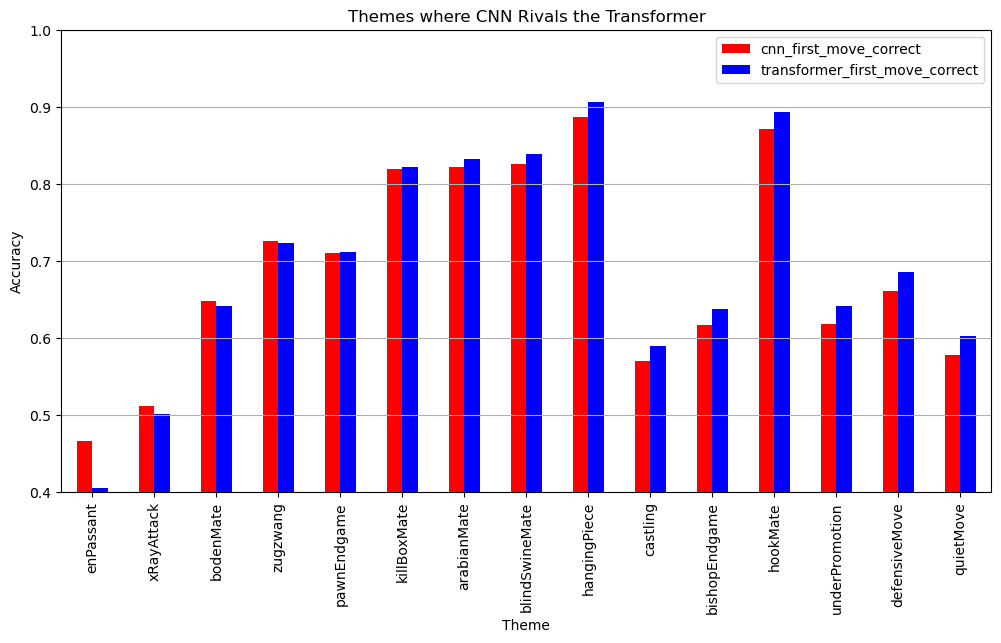

In [19]:
# 1. Explode the Themes (puzzles have multiple themes like "fork pin")
# We assume 'Themes' is a space-separated string. We drop NaNs first.
exploded_themes = puzzles_df.dropna(subset=['Themes']).assign(Theme=puzzles_df['Themes'].str.split(' ')).explode('Theme')

# 2. Filter for major themes (to avoid noise from themes that only appear 5 times)
theme_counts = exploded_themes['Theme'].value_counts()
major_themes = theme_counts[theme_counts > 1000].index # Only themes with > 1000 puzzles
filtered_themes = exploded_themes[exploded_themes['Theme'].isin(major_themes)]

# 3. Calculate Accuracy per Theme
theme_stats = filtered_themes.groupby('Theme')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
theme_stats['Gap'] = theme_stats['transformer_first_move_correct'] - theme_stats['cnn_first_move_correct']

# 4. Sort by where CNN does best (Lowest Gap or Negative Gap)
cnn_wins = theme_stats.sort_values('Gap').head(15)

print("--- Top 15 Themes where CNN is Strongest (relative to Transformer) ---")
display(cnn_wins)

# Visualize the "CNN Favorites"
plt.figure(figsize=(12, 6))
# We plot the accuracies side by side
cnn_wins[['cnn_first_move_correct', 'transformer_first_move_correct']].plot(kind='bar', figsize=(12,6), color=['red', 'blue'])
plt.title("Themes where CNN Rivals the Transformer")
plt.ylabel("Accuracy")
plt.ylim(0.4, 1.0) # Zoom in to see differences
plt.grid(axis='y')
plt.show()

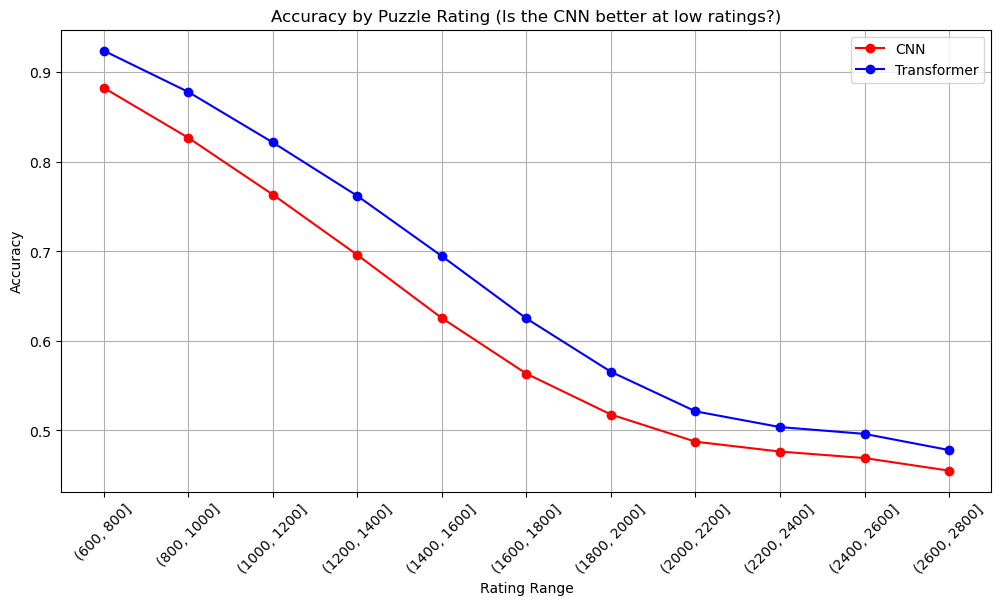

Gap by Rating:


,rating_bin,cnn_first_move_correct,transformer_first_move_correct,Gap (Trans - CNN)
0,"(600, 800]",0.882703,0.924154,0.041451
1,"(800, 1000]",0.826883,0.878088,0.051205
2,"(1000, 1200]",0.763386,0.821642,0.058256
3,"(1200, 1400]",0.695974,0.761934,0.065961
4,"(1400, 1600]",0.625424,0.694607,0.069183
5,"(1600, 1800]",0.563328,0.624982,0.061655
6,"(1800, 2000]",0.517713,0.565405,0.047692
7,"(2000, 2200]",0.487353,0.521266,0.033913
8,"(2200, 2400]",0.476321,0.503673,0.027352
9,"(2400, 2600]",0.469074,0.496065,0.026991


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create Rating Bins (e.g., 600-800, 800-1000...)
# We use the raw dataframe 'df' (or whatever you named your loaded csv)
puzzles_df['rating_bin'] = pd.cut(puzzles_df['Rating'], bins=range(600, 3000, 200))

# Calculate Accuracy per Bin
# We group by the bin and calculate the mean of the boolean 'correct' columns
bin_analysis = puzzles_df.groupby('rating_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean().reset_index()

# Calculate the Gap
bin_analysis['Gap (Trans - CNN)'] = bin_analysis['transformer_first_move_correct'] - bin_analysis['cnn_first_move_correct']

# Visualization
plt.figure(figsize=(12, 6))

# Plot Accuracies
plt.plot(bin_analysis['rating_bin'].astype(str), bin_analysis['cnn_first_move_correct'], marker='o', label='CNN', color='red')
plt.plot(bin_analysis['rating_bin'].astype(str), bin_analysis['transformer_first_move_correct'], marker='o', label='Transformer', color='blue')

plt.title('Accuracy by Puzzle Rating (Is the CNN better at low ratings?)')
plt.xlabel('Rating Range')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Print the table to find the smallest gap
print("Gap by Rating:")
display(bin_analysis)

--- Top 15 Themes where CNN is Strongest (relative to Transformer) ---


,cnn_first_move_correct,transformer_first_move_correct,Gap
Theme,,,
enPassant,0.465539,0.405514,-0.060025
xRayAttack,0.511499,0.501491,-0.010008
bodenMate,0.647616,0.641198,-0.006418
zugzwang,0.725410,0.722588,-0.002823
pawnEndgame,0.710683,0.711363,0.000680
killBoxMate,0.819151,0.822092,0.002941
arabianMate,0.822384,0.832725,0.010341
blindSwineMate,0.826285,0.838547,0.012262
hangingPiece,0.886230,0.906020,0.019790


<Figure size 1200x600 with 0 Axes>

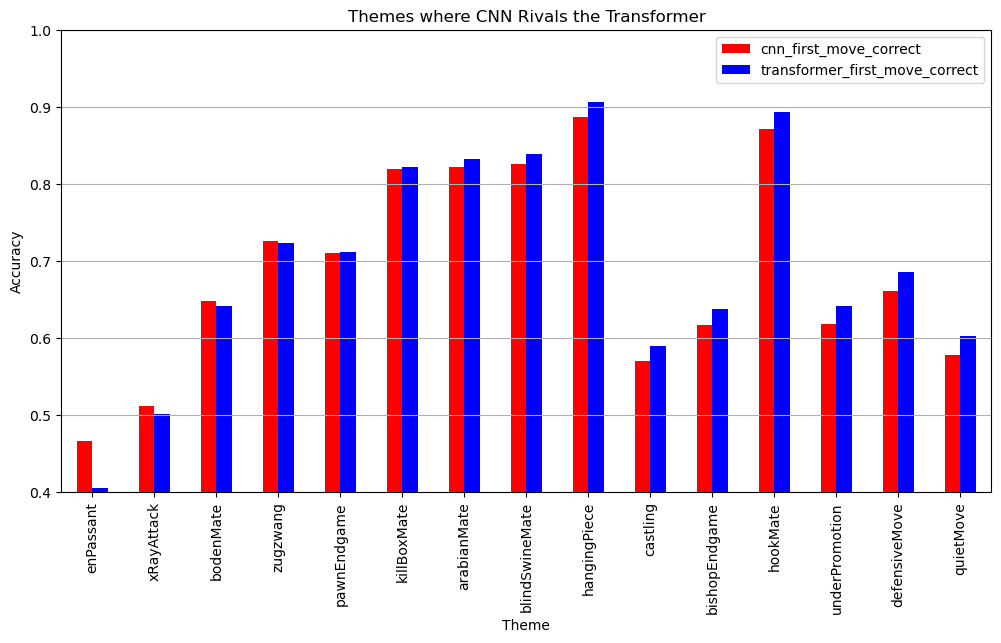

In [ ]:
# 1. Explode the Themes
exploded_themes = puzzles_df.dropna(subset=['Themes']).assign(Theme=puzzles_df['Themes'].str.split(' ')).explode('Theme')

# 2. Filter for major themes (> 1000 occurrences)
theme_counts = exploded_themes['Theme'].value_counts()
major_themes = theme_counts[theme_counts > 1000].index
filtered_themes = exploded_themes[exploded_themes['Theme'].isin(major_themes)]

# 3. Calculate Accuracy per Theme
# FIX: Updated column names here
theme_stats = filtered_themes.groupby('Theme')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
theme_stats['Gap'] = theme_stats['transformer_first_move_correct'] - theme_stats['cnn_first_move_correct']

# 4. Sort by where CNN does best (Lowest Gap)
cnn_wins = theme_stats.sort_values('Gap').head(15)

print("--- Top 15 Themes where CNN is Strongest (relative to Transformer) ---")
display(cnn_wins)

# Visualize
plt.figure(figsize=(12, 6))
# FIX: Updated column names here for plotting
cnn_wins[['cnn_first_move_correct', 'transformer_first_move_correct']].plot(kind='bar', figsize=(12,6), color=['red', 'blue'])
plt.title("Themes where CNN Rivals the Transformer")
plt.ylabel("Accuracy")
plt.ylim(0.4, 1.0)
plt.grid(axis='y')
plt.show()

Unique Winners: ['Draw' 'AuraChessCNN' 'AuraChessTransformer']


/var/folders/k7/3mgyrbss4l18j9dj7h41t4sc0000gp/T/ipykernel_15376/346638908.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=length_stats, x='length_bin', y='Transformer_Win_Rate', palette='viridis')


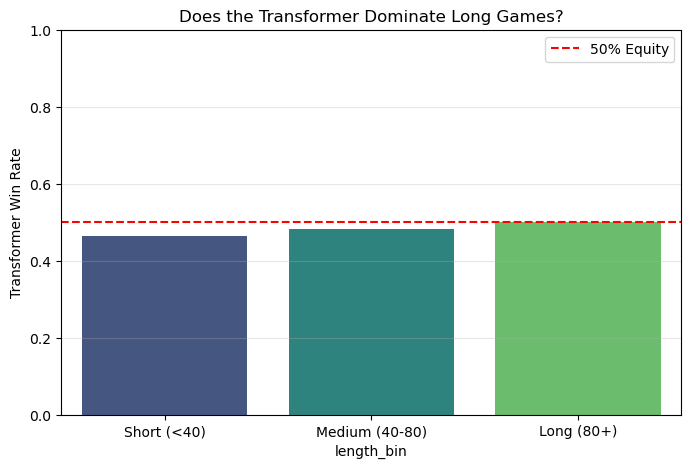


--- Win Rates by Game Length ---


,length_bin,Transformer_Win_Rate
0,Short (<40),0.463158
1,Medium (40-80),0.482759
2,Long (80+),0.500000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inspect the "Winner" column to be safe
# This prints the unique names so you can confirm exactly how "Transformer" is written
print("Unique Winners:", games_df['winner'].unique())

# 2. Create Bins for Game Length
# We use the existing 'num_moves' column you confirmed
labels = ['Short (<40)', 'Medium (40-80)', 'Long (80+)']
games_df['length_bin'] = pd.cut(games_df['num_moves'], 
                                bins=[0, 40, 80, 500], 
                                labels=labels)

# 3. Define Logic to Check if Transformer Won
def is_transformer_win(row):
    # Check if the winner string contains "Transformer" (case insensitive)
    # This handles "AuraChessTransformer", "Transformer", etc.
    winner_str = str(row['winner']).lower()
    return 'transformer' in winner_str

# Apply the logic to create a boolean column
games_df['transformer_won'] = games_df.apply(is_transformer_win, axis=1)

# 4. Calculate Win Rate per Bin
length_stats = games_df.groupby('length_bin', observed=True)['transformer_won'].mean().reset_index(name='Transformer_Win_Rate')

# 5. Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=length_stats, x='length_bin', y='Transformer_Win_Rate', palette='viridis')
plt.axhline(0.5, color='red', linestyle='--', label='50% Equity')

plt.title('Does the Transformer Dominate Long Games?')
plt.ylabel('Transformer Win Rate')
plt.ylim(0, 1.0) # Win rate is between 0 and 1
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n--- Win Rates by Game Length ---")
display(length_stats)

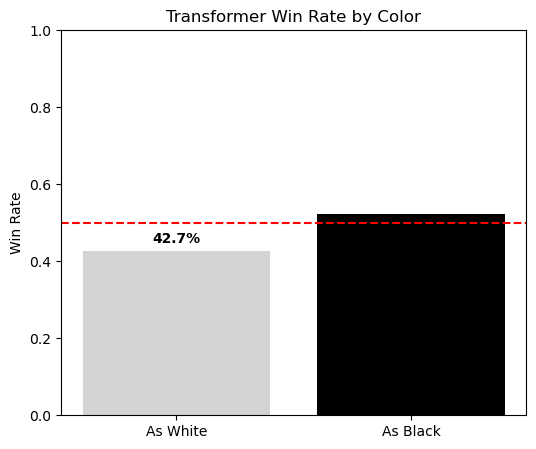

In [ ]:
# Create a mask for when Transformer played White vs Black
# We look for "Transformer" in the player name columns
trans_is_white = games_df['white_player'].str.contains('Transformer', case=False, na=False)
trans_is_black = games_df['black_player'].str.contains('Transformer', case=False, na=False)

# Calculate Win Rates
# We reuse the 'transformer_won' column created in the previous cell
win_rate_as_white = games_df[trans_is_white]['transformer_won'].mean()
win_rate_as_black = games_df[trans_is_black]['transformer_won'].mean()

# Visualize
plt.figure(figsize=(6, 5))
plt.bar(['As White', 'As Black'], [win_rate_as_white, win_rate_as_black], color=['lightgray', 'black'])
plt.title('Transformer Win Rate by Color')
plt.ylabel('Win Rate')
plt.ylim(0, 1.0)
plt.axhline(0.5, color='red', linestyle='--')

# Add text labels on bars
plt.text(0, win_rate_as_white + 0.02, f"{win_rate_as_white:.1%}", ha='center', fontweight='bold')
plt.text(1, win_rate_as_black + 0.02, f"{win_rate_as_black:.1%}", ha='center', color='white', fontweight='bold')

plt.show()

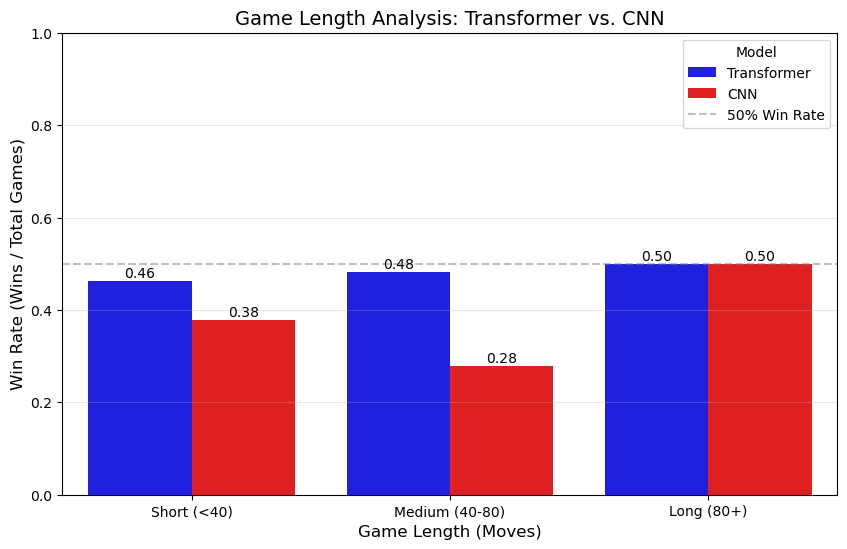


--- Detailed Win Rates by Length ---


winner_category,length_bin,CNN,Draw,Transformer
0,Short (<40),0.378947,0.157895,0.463158
1,Medium (40-80),0.279693,0.237548,0.482759
2,Long (80+),0.500000,0.000000,0.500000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Standardize the "Winner" Column
# This ensures we clearly label 'Transformer', 'CNN', or 'Draw' regardless of file naming quirks
def get_winner_category(row):
    w = str(row['winner']).lower()
    if 'transformer' in w:
        return 'Transformer'
    elif 'cnn' in w:
        return 'CNN'
    return 'Draw'

games_df['winner_category'] = games_df.apply(get_winner_category, axis=1)

# 2. Create Bins for Game Length
labels = ['Short (<40)', 'Medium (40-80)', 'Long (80+)']
games_df['length_bin'] = pd.cut(games_df['num_moves'], 
                                bins=[0, 40, 80, 500], 
                                labels=labels)

# 3. Calculate Win Rates for BOTH models
# We group by Bin + Winner to get the counts, then divide by the total games in that bin
win_counts = games_df.groupby(['length_bin', 'winner_category'], observed=True).size().unstack(fill_value=0)
bin_totals = win_counts.sum(axis=1)

# Calculate percentages (Win Rate = Wins / Total Games in Bin)
win_rates = win_counts.div(bin_totals, axis=0).reset_index()

# Reshape the data for Seaborn (Melting into 'Long' format)
# We only select 'Transformer' and 'CNN' columns (ignoring 'Draw' for the plot)
plot_data = win_rates.melt(id_vars='length_bin', 
                           value_vars=['Transformer', 'CNN'], 
                           var_name='Model', 
                           value_name='Win_Rate')

# 4. Visualize Side-by-Side
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='length_bin', y='Win_Rate', hue='Model', palette=['blue', 'red'])

# Add formatting
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.5, label='50% Win Rate')
plt.title('Game Length Analysis: Transformer vs. CNN', fontsize=14)
plt.ylabel('Win Rate (Wins / Total Games)', fontsize=12)
plt.xlabel('Game Length (Moves)', fontsize=12)
plt.ylim(0, 1.0)
plt.legend(title='Model')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.show()

print("\n--- Detailed Win Rates by Length ---")
display(win_rates)

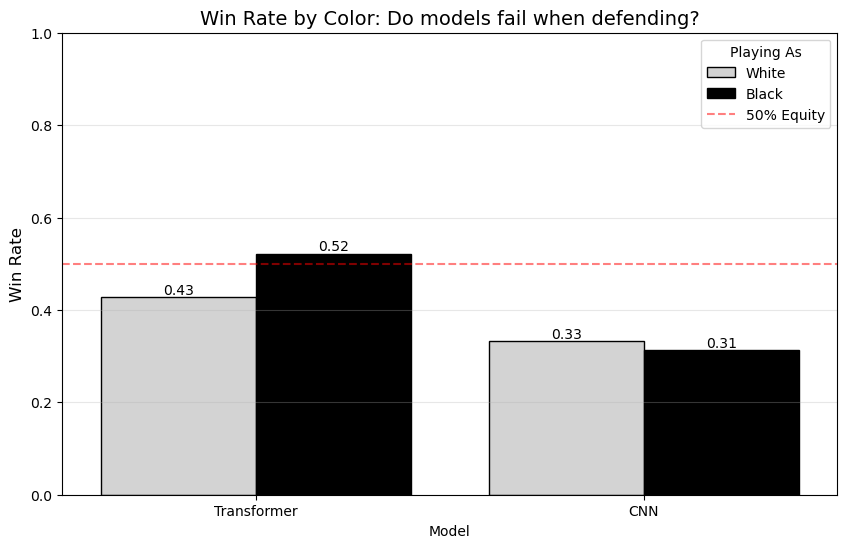


--- Detailed Win Rates by Color ---


,Model,Color,Win_Rate
0,Transformer,White,0.427313
1,Transformer,Black,0.522124
2,CNN,White,0.331858
3,CNN,Black,0.312775


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Standardize Winner (if not already done)
def get_winner_category(row):
    w = str(row['winner']).lower()
    if 'transformer' in w:
        return 'Transformer'
    elif 'cnn' in w:
        return 'CNN'
    return 'Draw'

games_df['winner_category'] = games_df.apply(get_winner_category, axis=1)

# 2. Function to calculate win rate for a specific model and color
def calculate_color_win_rate(df, model_name, color):
    # Filter for games where the model played the specific color
    if color == 'White':
        games_played = df[df['white_player'].str.contains(model_name, case=False, na=False)]
    else:
        games_played = df[df['black_player'].str.contains(model_name, case=False, na=False)]
    
    if len(games_played) == 0:
        return 0.0
    
    # Calculate how many of those games were won by the model
    wins = len(games_played[games_played['winner_category'] == model_name])
    
    return wins / len(games_played)

# 3. Compute Data for Plotting
models = ['Transformer', 'CNN']
colors = ['White', 'Black']
data = []

for model in models:
    for color in colors:
        rate = calculate_color_win_rate(games_df, model, color)
        data.append({'Model': model, 'Color': color, 'Win_Rate': rate})

# Create DataFrame
color_stats = pd.DataFrame(data)

# 4. Visualize
plt.figure(figsize=(10, 6))
# We map White color to Light Gray and Black color to Black for intuitive reading
sns.barplot(data=color_stats, x='Model', y='Win_Rate', hue='Color', palette=['lightgray', 'black'], edgecolor='black')

# Add formatting
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='50% Equity')
plt.title('Win Rate by Color: Do models fail when defending?', fontsize=14)
plt.ylabel('Win Rate', fontsize=12)
plt.ylim(0, 1.0)
plt.legend(title='Playing As')
plt.grid(axis='y', alpha=0.3)

# Add labels on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.show()

print("\n--- Detailed Win Rates by Color ---")
display(color_stats)

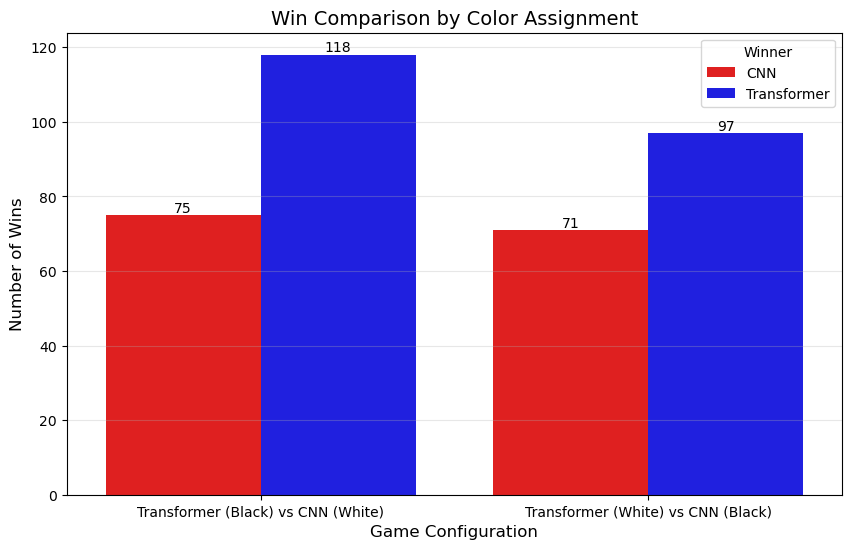


--- Detailed Win Counts ---


winner_category,CNN,Transformer
scenario,,
Transformer (Black) vs CNN (White),75,118
Transformer (White) vs CNN (Black),71,97


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Standardize Winner (Robust check)
def get_winner_category(row):
    w = str(row['winner']).lower()
    if 'transformer' in w:
        return 'Transformer'
    elif 'cnn' in w:
        return 'CNN'
    return 'Draw'

games_df['winner_category'] = games_df.apply(get_winner_category, axis=1)

# 2. Identify the Scenario for each game
def get_game_scenario(row):
    # Check who is White
    white_is_trans = 'transformer' in str(row['white_player']).lower()
    black_is_trans = 'transformer' in str(row['black_player']).lower()
    
    if white_is_trans:
        return 'Transformer (White) vs CNN (Black)'
    elif black_is_trans:
        return 'Transformer (Black) vs CNN (White)'
    else:
        return 'Other' # Should not happen in 1v1 dataset

games_df['scenario'] = games_df.apply(get_game_scenario, axis=1)

# Filter out any "Other" games just in case
plot_df = games_df[games_df['scenario'] != 'Other'].copy()

# 3. Aggregate Wins for each model in each scenario
# We group by Scenario + Winner
win_counts = plot_df.groupby(['scenario', 'winner_category']).size().reset_index(name='Count')

# Filter to show only Wins (ignoring draws for this specific graph request)
# If you want to see draws, just remove the line below
win_counts = win_counts[win_counts['winner_category'] != 'Draw']

# 4. Visualize
plt.figure(figsize=(10, 6))
sns.barplot(
    data=win_counts, 
    x='scenario', 
    y='Count', 
    hue='winner_category', 
    palette={'Transformer': 'blue', 'CNN': 'red'}
)

plt.title('Win Comparison by Color Assignment', fontsize=14)
plt.xlabel('Game Configuration', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.legend(title='Winner')
plt.grid(axis='y', alpha=0.3)

# Add number labels on top of bars
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()

# Display the raw numbers
print("\n--- Detailed Win Counts ---")
display(win_counts.pivot(index='scenario', columns='winner_category', values='Count'))

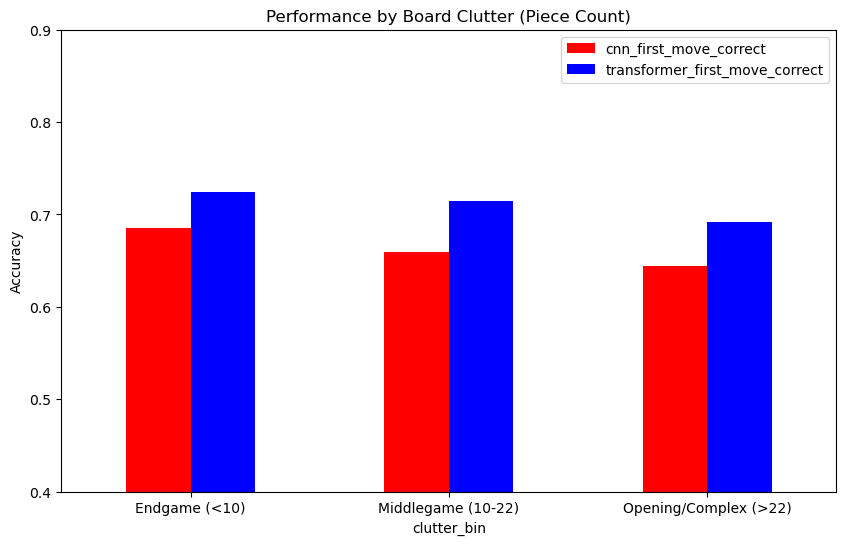

--- Accuracy Gap by Piece Count ---


,cnn_first_move_correct,transformer_first_move_correct,Gap (Trans - CNN)
clutter_bin,,,
Endgame (<10),0.685490,0.724411,0.038920
Middlegame (10-22),0.659612,0.714490,0.054877
Opening/Complex (>22),0.644241,0.691634,0.047393


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Feature Engineering: Count Pieces
# FEN looks like: "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"
# We just count the letters in the first part (before the first space)
def count_pieces(fen):
    board_part = fen.split(' ')[0]
    # Count letters (pieces)
    return sum(c.isalpha() for c in board_part)

# This might take a minute for 5M rows, but it's worth it
if 'piece_count' not in puzzles_df.columns:
    puzzles_df['piece_count'] = puzzles_df['FEN'].apply(count_pieces)

# 2. Binning
labels = ['Endgame (<10)', 'Middlegame (10-22)', 'Opening/Complex (>22)']
puzzles_df['clutter_bin'] = pd.cut(puzzles_df['piece_count'], 
                                   bins=[0, 10, 22, 33], 
                                   labels=labels)

# 3. Calculate Accuracy per Bin
clutter_stats = puzzles_df.groupby('clutter_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
clutter_stats['Gap (Trans - CNN)'] = clutter_stats['transformer_first_move_correct'] - clutter_stats['cnn_first_move_correct']

# 4. Visualize
clutter_stats[['cnn_first_move_correct', 'transformer_first_move_correct']].plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title("Performance by Board Clutter (Piece Count)")
plt.ylabel("Accuracy")
plt.ylim(0.4, 0.9)
plt.xticks(rotation=0)
plt.show()

print("--- Accuracy Gap by Piece Count ---")
display(clutter_stats)

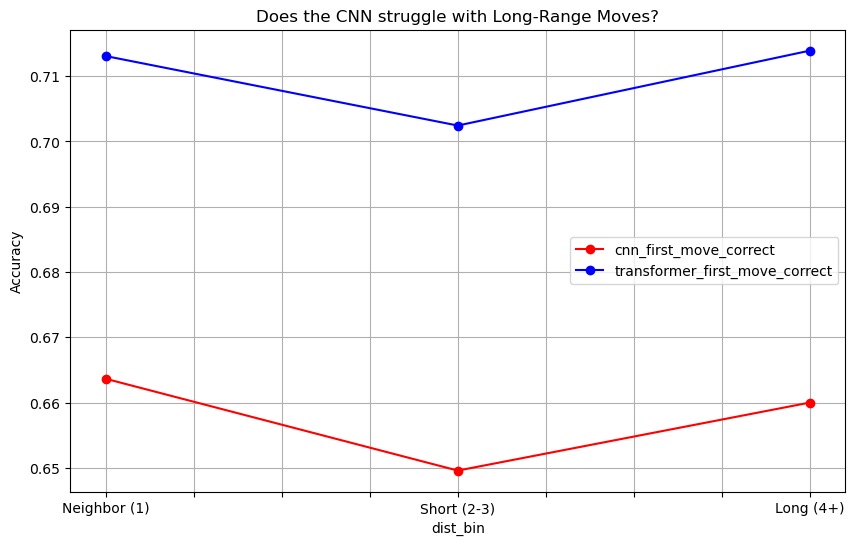

--- Accuracy by Move Distance ---


,cnn_first_move_correct,transformer_first_move_correct
dist_bin,,
Neighbor (1),0.663649,0.713055
Short (2-3),0.649586,0.702409
Long (4+),0.660005,0.713887


In [ ]:
# 1. Helper to calculate move distance
def get_move_distance(move_str):
    # UCI format: "e2e4"
    if not isinstance(move_str, str) or len(move_str) < 4:
        return 0
    
    col_map = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8}
    
    c1, r1 = col_map[move_str[0]], int(move_str[1])
    c2, r2 = col_map[move_str[2]], int(move_str[3])
    
    # Chebyshev distance (max of rank diff or file diff)
    return max(abs(c1 - c2), abs(r1 - r2))

# Calculate for the Ground Truth Move
# (We assume 'Moves' string exists, we take the first move)
puzzles_df['gt_move_str'] = puzzles_df['Moves'].astype(str).apply(lambda x: x.split()[0])
puzzles_df['move_distance'] = puzzles_df['gt_move_str'].apply(get_move_distance)

# 2. Analysis
# We bin distances: 1 (Neighbor), 2-3 (Short), 4-7 (Long/Sniper)
puzzles_df['dist_bin'] = pd.cut(puzzles_df['move_distance'], 
                                bins=[0, 1, 3, 8], 
                                labels=['Neighbor (1)', 'Short (2-3)', 'Long (4+)'])

dist_stats = puzzles_df.groupby('dist_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# 3. Visualize
dist_stats.plot(kind='line', marker='o', figsize=(10, 6), color=['red', 'blue'])
plt.title("Does the CNN struggle with Long-Range Moves?")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print("--- Accuracy by Move Distance ---")
display(dist_stats)

CNN 'Near Miss' Rate: 23.85%
Transformer 'Near Miss' Rate: 22.45%


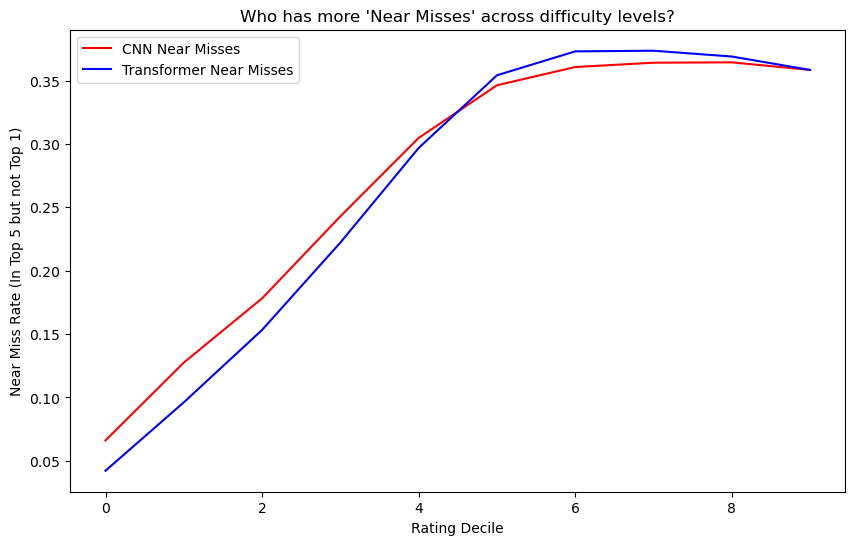

In [ ]:
# Calculate the "Recovery Rate"
# This is: (Top5 Correct - Top1 Correct)
# It represents cases where the model "almost" had it.

puzzles_df['cnn_recovery'] = puzzles_df['cnn_first_move_top5_correct'] - puzzles_df['cnn_first_move_correct']
puzzles_df['trans_recovery'] = puzzles_df['transformer_first_move_top5_correct'] - puzzles_df['transformer_first_move_correct']

print(f"CNN 'Near Miss' Rate: {puzzles_df['cnn_recovery'].mean():.2%}")
print(f"Transformer 'Near Miss' Rate: {puzzles_df['trans_recovery'].mean():.2%}")

# Optional: See if this changes by Rating
recovery_by_rating = puzzles_df.groupby(pd.cut(puzzles_df['Rating'], bins=10, labels=False))[['cnn_recovery', 'trans_recovery']].mean()

plt.figure(figsize=(10, 6))
plt.plot(recovery_by_rating.index, recovery_by_rating['cnn_recovery'], label='CNN Near Misses', color='red')
plt.plot(recovery_by_rating.index, recovery_by_rating['trans_recovery'], label='Transformer Near Misses', color='blue')
plt.title("Who has more 'Near Misses' across difficulty levels?")
plt.xlabel("Rating Decile")
plt.ylabel("Near Miss Rate (In Top 5 but not Top 1)")
plt.legend()
plt.show()

--- Themes where CNN Outperforms Transformer ---


,cnn_first_move_correct,transformer_first_move_correct,CNN_Advantage
Theme,,,
enPassant,0.465539,0.405514,0.060025
xRayAttack,0.511499,0.501491,0.010008
bodenMate,0.647616,0.641198,0.006418
zugzwang,0.725410,0.722588,0.002823
pawnEndgame,0.710683,0.711363,-0.000680
killBoxMate,0.819151,0.822092,-0.002941
arabianMate,0.822384,0.832725,-0.010341
blindSwineMate,0.826285,0.838547,-0.012262
hangingPiece,0.886230,0.906020,-0.019790


/var/folders/k7/3mgyrbss4l18j9dj7h41t4sc0000gp/T/ipykernel_15376/2939265697.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnn_favorites['CNN_Advantage'], y=cnn_favorites.index, palette='Reds_r')


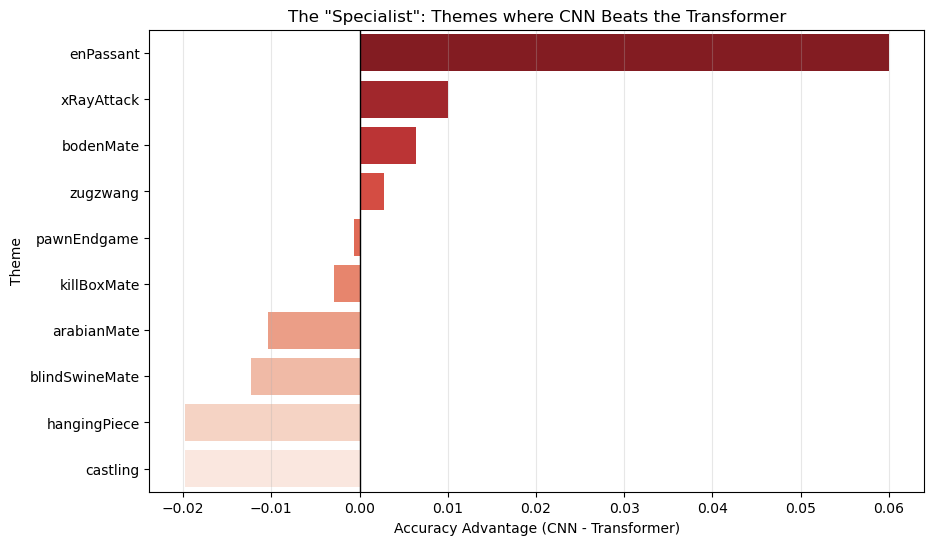

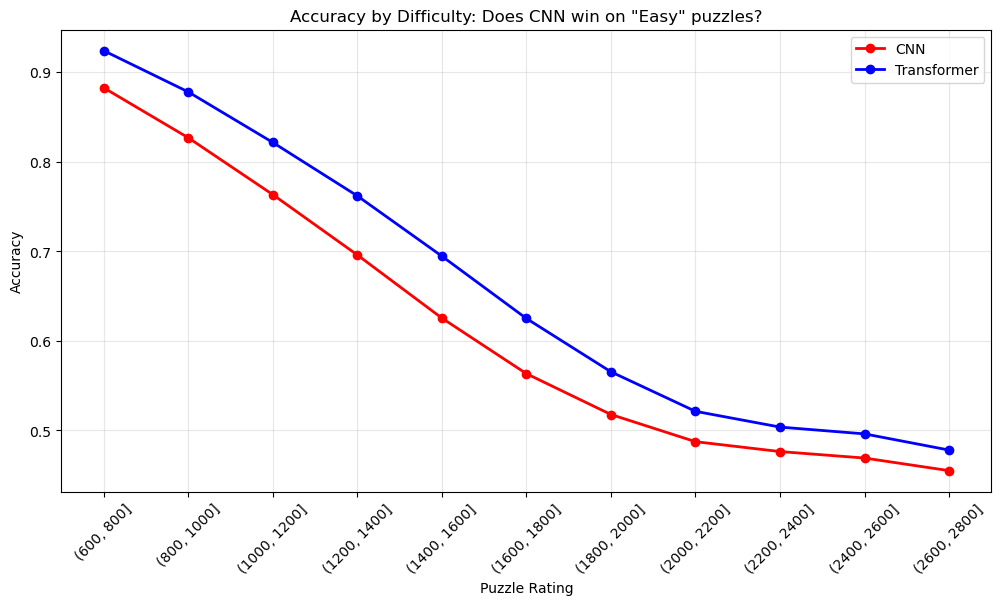


CNN 'Revenge' Count: 343786 puzzles
Avg Rating of Revenge Puzzles: 1672
Global Avg Rating: 1484


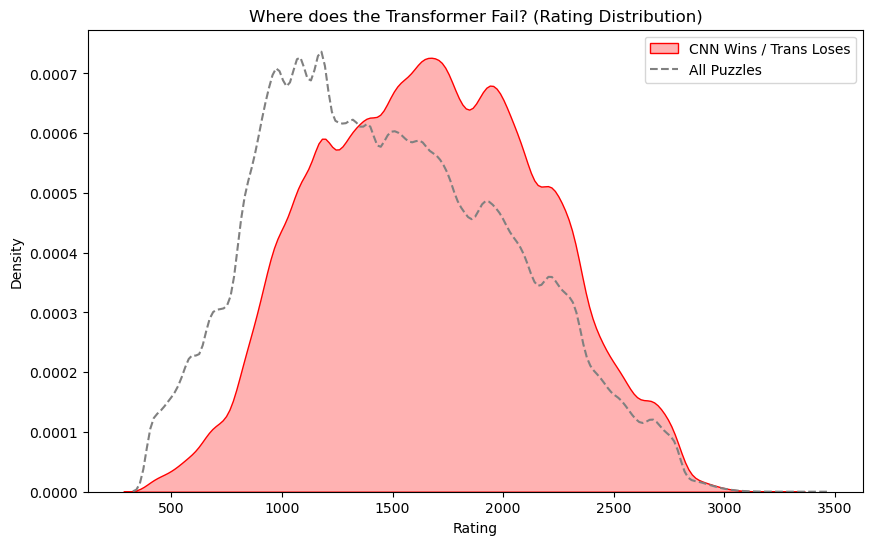

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a copy to avoid warnings
df = raw_df.copy()

# --- 1. THEME ANALYSIS (The "Specialist" Argument) ---
# Explode themes to analyze them individually
exploded_themes = df.dropna(subset=['Themes']).assign(Theme=df['Themes'].str.split(' ')).explode('Theme')

# Filter for themes with at least 500 puzzles (to ensure statistical significance)
theme_counts = exploded_themes['Theme'].value_counts()
valid_themes = theme_counts[theme_counts > 500].index
theme_data = exploded_themes[exploded_themes['Theme'].isin(valid_themes)]

# Calculate accuracy per theme
theme_perf = theme_data.groupby('Theme')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# Calculate "CNN Advantage" (Positive means CNN wins)
theme_perf['CNN_Advantage'] = theme_perf['cnn_first_move_correct'] - theme_perf['transformer_first_move_correct']

# Get the top 10 themes where CNN is strongest
cnn_favorites = theme_perf.sort_values('CNN_Advantage', ascending=False).head(10)

print("--- Themes where CNN Outperforms Transformer ---")
display(cnn_favorites)

# Visualization 1: CNN's Strongest Themes
plt.figure(figsize=(10, 6))
sns.barplot(x=cnn_favorites['CNN_Advantage'], y=cnn_favorites.index, palette='Reds_r')
plt.axvline(0, color='black', linewidth=1)
plt.title('The "Specialist": Themes where CNN Beats the Transformer')
plt.xlabel('Accuracy Advantage (CNN - Transformer)')
plt.grid(axis='x', alpha=0.3)
plt.show()

# --- 2. RATING ANALYSIS (The "Complexity" Argument) ---
# Bin ratings into groups of 200
df['rating_bin'] = pd.cut(df['Rating'], bins=range(600, 3000, 200))

# Calculate accuracy per bin
rating_stats = df.groupby('rating_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# Visualization 2: Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(rating_stats.index.astype(str), rating_stats['cnn_first_move_correct'], marker='o', label='CNN', color='red', linewidth=2)
plt.plot(rating_stats.index.astype(str), rating_stats['transformer_first_move_correct'], marker='o', label='Transformer', color='blue', linewidth=2)

# Highlight the crossover point
plt.title('Accuracy by Difficulty: Does CNN win on "Easy" puzzles?')
plt.xlabel('Puzzle Rating')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# --- 3. REVENGE ANALYSIS (The "Blind Spot" Argument) ---
# Isolate puzzles where CNN is RIGHT and Transformer is WRONG
revenge_df = df[(df['cnn_first_move_correct'] == 1) & (df['transformer_first_move_correct'] == 0)]

print(f"\nCNN 'Revenge' Count: {len(revenge_df)} puzzles")
print(f"Avg Rating of Revenge Puzzles: {revenge_df['Rating'].mean():.0f}")
print(f"Global Avg Rating: {df['Rating'].mean():.0f}")

# Visualization 3: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(revenge_df['Rating'], fill=True, color='red', label='CNN Wins / Trans Loses', alpha=0.3)
sns.kdeplot(df['Rating'], linestyle='--', color='gray', label='All Puzzles')
plt.title('Where does the Transformer Fail? (Rating Distribution)')
plt.xlabel('Rating')
plt.legend()
plt.show()

Found 343786 puzzles where CNN beats Transformer!

--- Statistics of the 'CNN Revenge' Subset ---
Average Rating: 1672 (Global Avg: 1484)
Average Popularity: 86
Avg Solution Length: 5.09


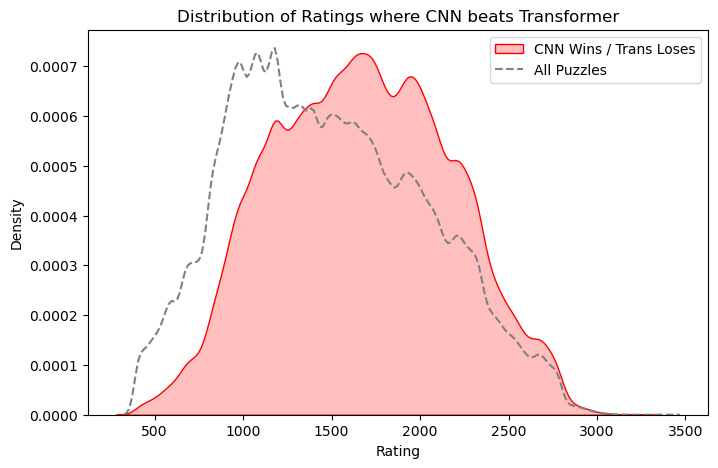

In [ ]:
# Calculate solution length if it doesn't exist (needed for the plot below)
if 'solution_length' not in puzzles_df.columns:
    puzzles_df['solution_length'] = puzzles_df['Moves'].apply(lambda x: len(str(x).split()))

# Create the "CNN Revenge" subset
# FIX: Updated column names here
cnn_revenge = puzzles_df[
    (puzzles_df['cnn_first_move_correct'] == 1) & 
    (puzzles_df['transformer_first_move_correct'] == 0)
]

print(f"Found {len(cnn_revenge)} puzzles where CNN beats Transformer!")

# Analyze this subset
print("\n--- Statistics of the 'CNN Revenge' Subset ---")
print(f"Average Rating: {cnn_revenge['Rating'].mean():.0f} (Global Avg: {puzzles_df['Rating'].mean():.0f})")
print(f"Average Popularity: {cnn_revenge['Popularity'].mean():.0f}")

# Check Solution Length
print(f"Avg Solution Length: {cnn_revenge['solution_length'].mean():.2f}")

plt.figure(figsize=(8,5))
sns.kdeplot(cnn_revenge['Rating'], label='CNN Wins / Trans Loses', fill=True, color='red')
sns.kdeplot(puzzles_df['Rating'], label='All Puzzles', linestyle='--', color='grey')
plt.title("Distribution of Ratings where CNN beats Transformer")
plt.legend()
plt.show()

--- Top Themes where CNN is 'Specialized' (High KL Contribution) ---


,Theme,P_x,Q_x,KL_contribution
59,mate,0.086917,0.084753,0.002192
12,oneMove,0.044743,0.043098,0.001676
9,mateIn1,0.044617,0.042976,0.001671
4,pawnEndgame,0.008882,0.008265,0.000640
7,hangingPiece,0.011090,0.010539,0.000565
18,defensiveMove,0.013806,0.013299,0.000517
16,kingsideAttack,0.019989,0.019533,0.000461
34,mateIn2,0.034394,0.033961,0.000436
53,advancedPawn,0.013782,0.013424,0.000362
40,backRankMate,0.009611,0.009256,0.000362


/var/folders/k7/3mgyrbss4l18j9dj7h41t4sc0000gp/T/ipykernel_15376/1231187991.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='KL_contribution', y='Theme', data=major_kl, palette='viridis')


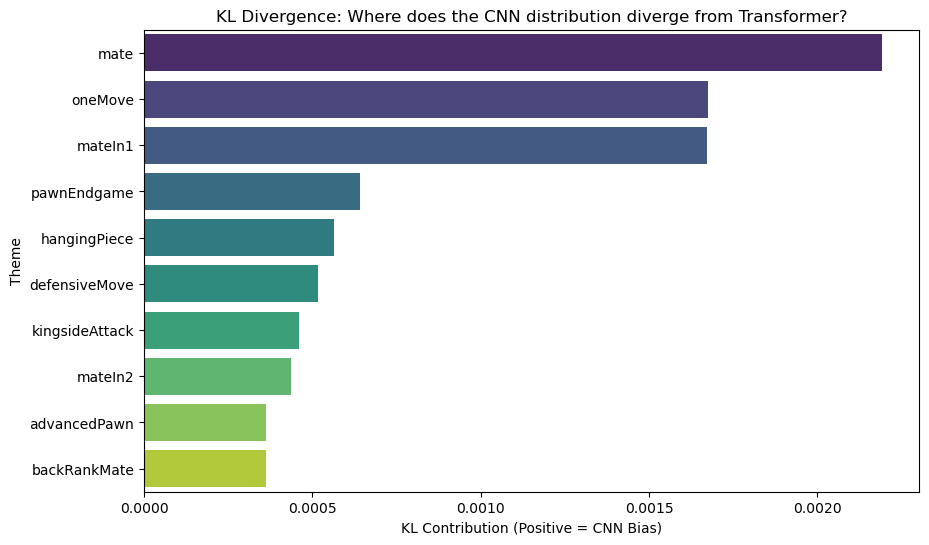

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_kl_divergence(df, cnn_col, trans_col):
    # 1. Explode themes so we can count them
    exploded = df.dropna(subset=['Themes']).assign(Theme=df['Themes'].str.split(' ')).explode('Theme')
    
    # 2. Define the two populations
    # Set P: Themes in puzzles CNN got right
    cnn_wins = exploded[exploded[cnn_col] == 1]
    # Set Q: Themes in puzzles Transformer got right
    trans_wins = exploded[exploded[trans_col] == 1]
    
    # 3. Calculate Probabilities (PMF)
    # We add a tiny epsilon to avoid division by zero
    epsilon = 1e-9
    
    # Get total counts for normalization
    p_counts = cnn_wins['Theme'].value_counts()
    q_counts = trans_wins['Theme'].value_counts()
    
    # Align the indexes (use only themes present in both or union)
    all_themes = set(p_counts.index).union(set(q_counts.index))
    
    data = []
    for theme in all_themes:
        # Get count, default to 0
        p_count = p_counts.get(theme, 0)
        q_count = q_counts.get(theme, 0)
        
        data.append({'Theme': theme, 'P_count': p_count, 'Q_count': q_count})
        
    kl_df = pd.DataFrame(data)
    
    # Normalize to get Probabilities P(x) and Q(x)
    kl_df['P_x'] = (kl_df['P_count'] + epsilon) / (kl_df['P_count'].sum() + epsilon * len(kl_df))
    kl_df['Q_x'] = (kl_df['Q_count'] + epsilon) / (kl_df['Q_count'].sum() + epsilon * len(kl_df))
    
    # 4. Calculate KL Contribution: P(x) * log(P(x) / Q(x))
    # High positive value = CNN specializes in this
    # High negative value = Transformer specializes in this
    kl_df['KL_contribution'] = kl_df['P_x'] * np.log(kl_df['P_x'] / kl_df['Q_x'])
    
    return kl_df.sort_values('KL_contribution', ascending=False)

# --- EXECUTE ---
kl_stats = calculate_kl_divergence(puzzles_df, 'cnn_first_move_correct', 'transformer_first_move_correct')

# Filter for relevant themes (ignore tiny noise)
major_kl = kl_stats[kl_stats['P_count'] + kl_stats['Q_count'] > 500].head(10)

print("--- Top Themes where CNN is 'Specialized' (High KL Contribution) ---")
display(major_kl[['Theme', 'P_x', 'Q_x', 'KL_contribution']])

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='KL_contribution', y='Theme', data=major_kl, palette='viridis')
plt.title('KL Divergence: Where does the CNN distribution diverge from Transformer?')
plt.xlabel('KL Contribution (Positive = CNN Bias)')
plt.show()

--- Causal Analysis for Theme: enPassant ---


,cnn_first_move_correct,transformer_first_move_correct,Count,Gap
rating_bin,,,,
"(600, 1000]",0.428571,0.285714,7,-0.142857
"(1000, 1400]",0.633588,0.541985,131,-0.091603
"(1400, 1800]",0.592613,0.542448,1814,-0.050165
"(1800, 2200]",0.464953,0.385981,3267,-0.078972
"(2200, 3000]",0.375409,0.332848,2749,-0.042561


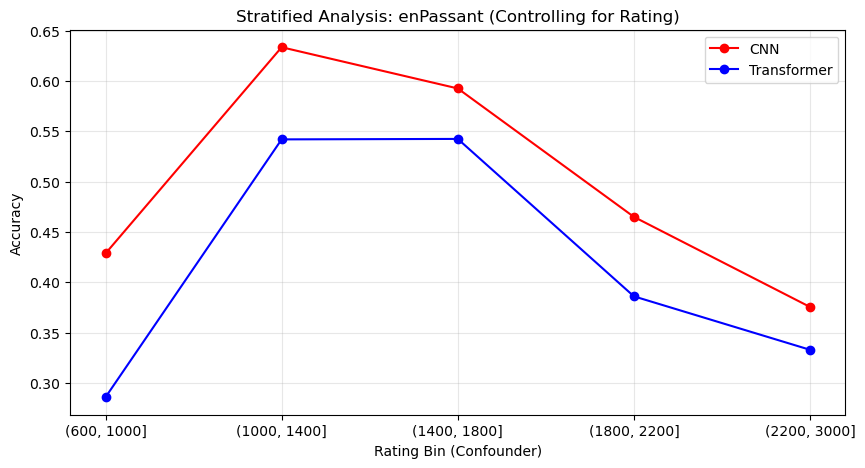

Weighted Average Gap (controlled for rating): -6.01%
CONCLUSION: The CNN is genuinely better at this theme, even after controlling for difficulty.


In [ ]:
def causal_stratification(df, target_theme):
    print(f"--- Causal Analysis for Theme: {target_theme} ---")
    
    # 1. Filter for the specific theme
    # (We assume 'Themes' column contains the string)
    theme_df = df[df['Themes'].str.contains(target_theme, na=False)].copy()
    
    # 2. Define the Confounder: Rating Bins (The "Backdoor Path")
    theme_df['rating_bin'] = pd.cut(theme_df['Rating'], bins=[600, 1000, 1400, 1800, 2200, 3000])
    
    # 3. Calculate Accuracy for both models within each bin
    # E(Y | T=CNN, Z=Rating) vs E(Y | T=Trans, Z=Rating)
    stratified = theme_df.groupby('rating_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
    stratified['Count'] = theme_df.groupby('rating_bin', observed=True)['Rating'].count()
    
    stratified['Gap'] = stratified['transformer_first_move_correct'] - stratified['cnn_first_move_correct']
    
    display(stratified)
    
    # 4. Plot to show if the gap persists across ALL ratings
    plt.figure(figsize=(10, 5))
    plt.plot(stratified.index.astype(str), stratified['cnn_first_move_correct'], marker='o', label='CNN', color='red')
    plt.plot(stratified.index.astype(str), stratified['transformer_first_move_correct'], marker='o', label='Transformer', color='blue')
    plt.title(f'Stratified Analysis: {target_theme} (Controlling for Rating)')
    plt.xlabel('Rating Bin (Confounder)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 5. Conclusion
    weighted_gap = np.average(stratified['Gap'], weights=stratified['Count'])
    print(f"Weighted Average Gap (controlled for rating): {weighted_gap:.2%}")
    if weighted_gap < 0:
        print("CONCLUSION: The CNN is genuinely better at this theme, even after controlling for difficulty.")
    else:
        print("CONCLUSION: The Transformer is actually better; the CNN just looked good because the puzzles were easy.")

# --- EXECUTE ON YOUR FINDINGS ---
# Pick the top theme from your previous "CNN Favorites" list
# Example: 'enPassant' or 'hangingPiece'
causal_stratification(puzzles_df, 'enPassant') 
# causal_stratification(puzzles_df, 'mateIn1')

In [9]:
# Create the Oracle Column (True if EITHER model got it right)
puzzles_df['oracle_correct'] = puzzles_df['cnn_first_move_correct'] | puzzles_df['transformer_first_move_correct']

# Calculate Accuracies
cnn_acc = puzzles_df['cnn_first_move_correct'].mean()
trans_acc = puzzles_df['transformer_first_move_correct'].mean()
oracle_acc = puzzles_df['oracle_correct'].mean()

print(f"CNN Accuracy:         {cnn_acc:.2%}")
print(f"Transformer Accuracy: {trans_acc:.2%}")
print(f"-----------------------------")
print(f"Hybrid Oracle Score:  {oracle_acc:.2%}")
print(f"Complementarity Gain: {oracle_acc - trans_acc:.2%}")

# Interpretation
if (oracle_acc - trans_acc) > 0.10:
    print("\nCONCLUSION: High Complementarity! These models make DIFFERENT mistakes.")
    print("A hybrid system could significantly outperform the individual models.")
else:
    print("\nCONCLUSION: High Redundancy. The Transformer mostly subsumes the CNN's knowledge.")

CNN Accuracy:         65.80%
Transformer Accuracy: 70.91%
-----------------------------
Hybrid Oracle Score:  77.05%
Complementarity Gain: 6.14%

CONCLUSION: High Redundancy. The Transformer mostly subsumes the CNN's knowledge.


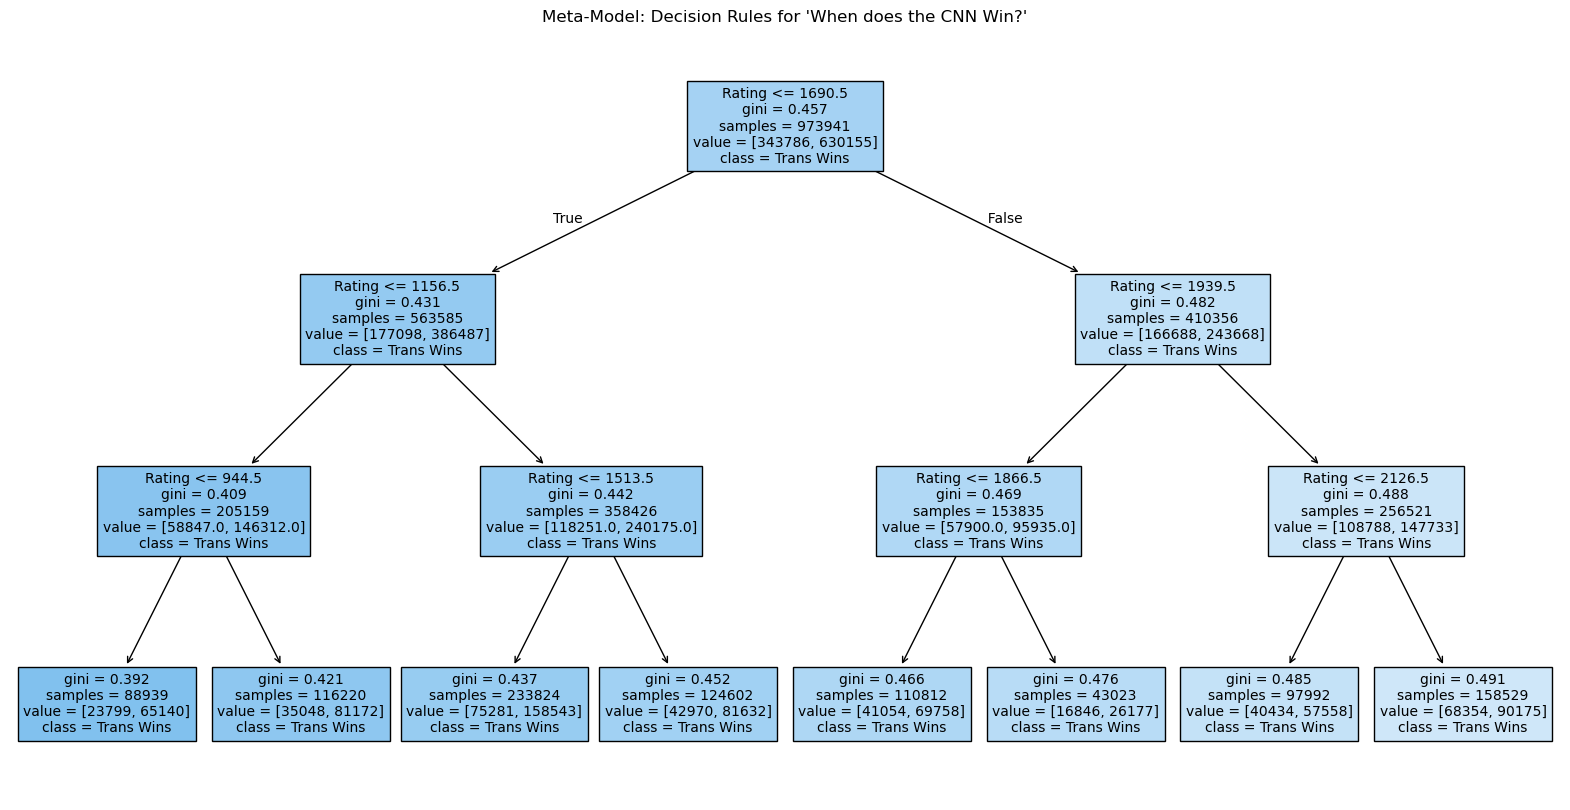

,Feature,Importance
0,Rating,1.0
1,Popularity,0.0
2,NbPlays,0.0


In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Define the Target: Who won?
# 0 = Tie/Both, 1 = CNN Wins (CNN Right, Trans Wrong), 2 = Trans Wins (Trans Right, CNN Wrong)
def get_outcome(row):
    if row['cnn_first_move_correct'] and not row['transformer_first_move_correct']:
        return 1 # CNN Exclusive Win
    elif not row['cnn_first_move_correct'] and row['transformer_first_move_correct']:
        return 2 # Trans Exclusive Win
    else:
        return 0 # Tie (Both Right or Both Wrong)

puzzles_df['outcome'] = puzzles_df.apply(get_outcome, axis=1)

# 2. Filter for "Disagreement" rows only (The interesting ones)
# We only care about distinguishing Class 1 vs Class 2
disagreement_df = puzzles_df[puzzles_df['outcome'] != 0].copy()

# 3. Prepare Features
# Ensure these columns exist (run your feature engineering cells if needed)
features = ['Rating', 'Popularity', 'NbPlays']
if 'solution_length' in puzzles_df.columns:
    features.append('solution_length')
if 'piece_count' in puzzles_df.columns:
    features.append('piece_count')

X = disagreement_df[features].fillna(0)
y = disagreement_df['outcome']

# 4. Train a simple Interpretable Tree (Max Depth = 3)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# 5. Visualize the Logic
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=features, 
          class_names=['CNN Wins', 'Trans Wins'], 
          filled=True, 
          fontsize=10)
plt.title("Meta-Model: Decision Rules for 'When does the CNN Win?'")
plt.show()

# Print Feature Importance
import pandas as pd
importance = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_})
display(importance.sort_values('Importance', ascending=False))

Running 1000 bootstrap iterations...

--- Statistical Significance Analysis ---
Mean Gap: 0.0512
95% Confidence Interval: [0.0501, 0.0522]


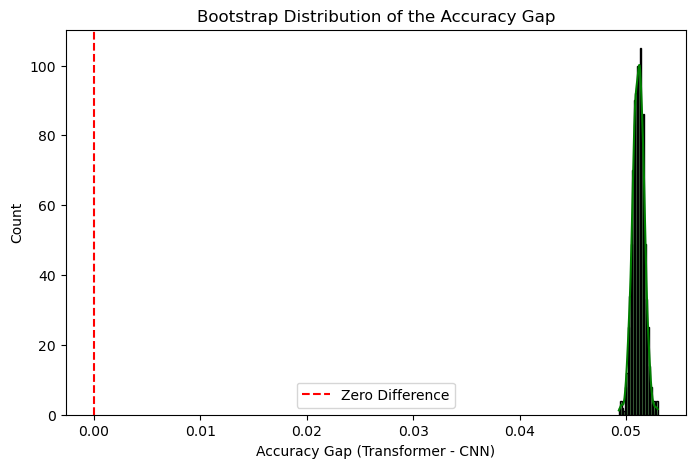

RESULT: The difference is Statistically Significant (Interval does not contain 0).


In [11]:
import numpy as np

# Number of iterations
n_iterations = 1000
n_size = int(len(puzzles_df) * 0.1) # Sample 10% for speed (or more if you have time)

gaps = []

print(f"Running {n_iterations} bootstrap iterations...")

for i in range(n_iterations):
    # Resample with replacement
    sample = puzzles_df.sample(n=n_size, replace=True)
    
    # Calculate Gap
    gap = sample['transformer_first_move_correct'].mean() - sample['cnn_first_move_correct'].mean()
    gaps.append(gap)

# Calculate Confidence Intervals
lower = np.percentile(gaps, 2.5)
upper = np.percentile(gaps, 97.5)
mean_gap = np.mean(gaps)

print(f"\n--- Statistical Significance Analysis ---")
print(f"Mean Gap: {mean_gap:.4f}")
print(f"95% Confidence Interval: [{lower:.4f}, {upper:.4f}]")

# Plot Distribution
plt.figure(figsize=(8, 5))
sns.histplot(gaps, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--', label='Zero Difference')
plt.title('Bootstrap Distribution of the Accuracy Gap')
plt.xlabel('Accuracy Gap (Transformer - CNN)')
plt.legend()
plt.show()

if lower > 0:
    print("RESULT: The difference is Statistically Significant (Interval does not contain 0).")
else:
    print("RESULT: The difference might be noise.")

Generating Heatmaps... (this might take a moment)


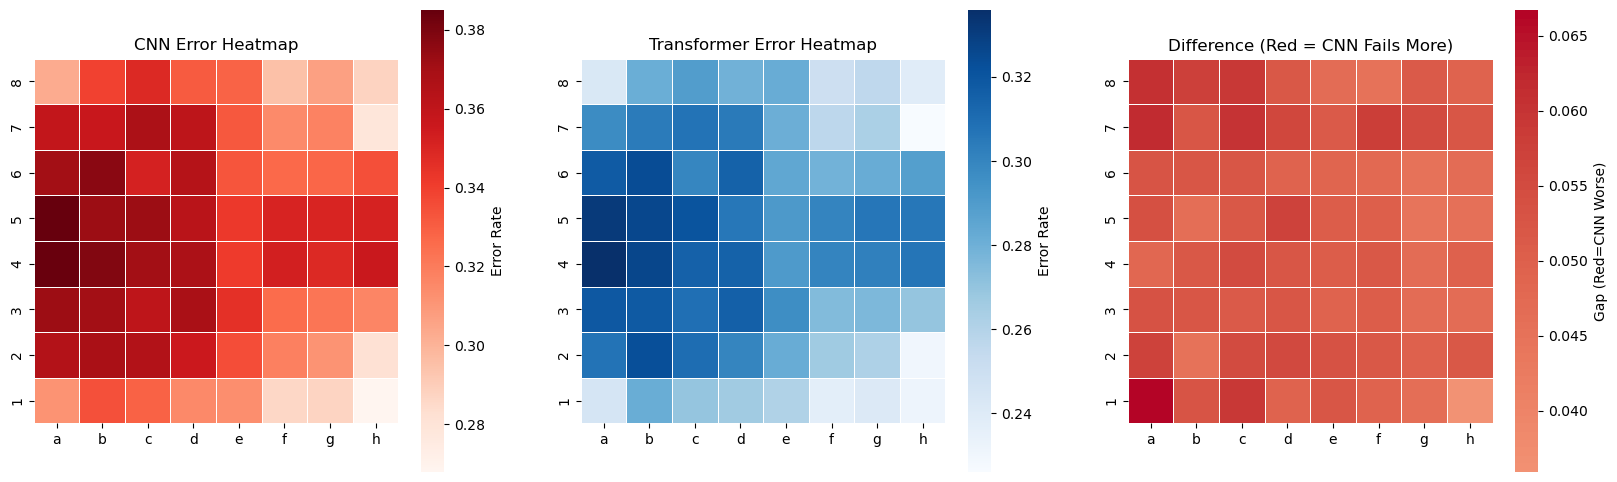

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Helper to map square 'e4' -> (3, 4) matrix coordinates
def square_to_coords(square):
    files = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
    f = files[square[0]]
    r = int(square[1]) - 1 # 1-based to 0-based
    return 7-r, f # Flip row so 8 is at top

# 1. Extract Target Square from the Ground Truth move (e.g., "e2e4" -> "e4")
# We assume the move format is UCI (e.g. "e2e4")
puzzles_df['target_square'] = puzzles_df['Moves'].astype(str).apply(lambda x: x.split()[0][2:4])

# 2. Initialize 8x8 grids for Error Counts
cnn_errors = np.zeros((8, 8))
trans_errors = np.zeros((8, 8))
move_counts = np.zeros((8, 8))

print("Generating Heatmaps... (this might take a moment)")

for idx, row in puzzles_df.iterrows():
    try:
        r, c = square_to_coords(row['target_square'])
        move_counts[r, c] += 1
        
        # If CNN wrong, add to error heatmap
        if row['cnn_first_move_correct'] == 0:
            cnn_errors[r, c] += 1
            
        # If Transformer wrong, add to error heatmap
        if row['transformer_first_move_correct'] == 0:
            trans_errors[r, c] += 1
    except:
        continue

# 3. Calculate Error Rate per Square (Errors / Total Moves to that square)
# Avoid division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    cnn_heatmap = cnn_errors / move_counts
    trans_heatmap = trans_errors / move_counts
    # Fill NaNs (squares that never appeared) with 0
    cnn_heatmap = np.nan_to_num(cnn_heatmap)
    trans_heatmap = np.nan_to_num(trans_heatmap)

# 4. Plot Side-by-Side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cnn_heatmap, ax=axes[0], cmap='Reds', linewidths=.5, square=True, cbar_kws={'label': 'Error Rate'})
axes[0].set_title('CNN Error Heatmap')
axes[0].set_xticklabels(['a','b','c','d','e','f','g','h'])
axes[0].set_yticklabels(['8','7','6','5','4','3','2','1'])

sns.heatmap(trans_heatmap, ax=axes[1], cmap='Blues', linewidths=.5, square=True, cbar_kws={'label': 'Error Rate'})
axes[1].set_title('Transformer Error Heatmap')
axes[1].set_xticklabels(['a','b','c','d','e','f','g','h'])
axes[1].set_yticklabels(['8','7','6','5','4','3','2','1'])

# The Difference Map (Red = CNN worse, Blue = Transformer worse)
diff_map = cnn_heatmap - trans_heatmap
sns.heatmap(diff_map, ax=axes[2], cmap='coolwarm', center=0, linewidths=.5, square=True, cbar_kws={'label': 'Gap (Red=CNN Worse)'})
axes[2].set_title('Difference (Red = CNN Fails More)')
axes[2].set_xticklabels(['a','b','c','d','e','f','g','h'])
axes[2].set_yticklabels(['8','7','6','5','4','3','2','1'])

plt.show()

--- Openings where CNN Rivals the Transformer ---


,cnn_first_move_correct,transformer_first_move_correct,Gap
opening_family,,,
Richter-Veresov,0.647992,0.661734,0.013742
Bogo-Indian,0.656598,0.670906,0.014308
Ware,0.701400,0.718507,0.017107
Semi-Slav,0.670509,0.699968,0.029459
Yusupov-Rubinstein,0.690058,0.723684,0.033626
Czech,0.629388,0.663673,0.034286
Three,0.685583,0.721516,0.035933
Dutch,0.695125,0.731622,0.036497
Rapport-Jobava,0.690694,0.728303,0.037608


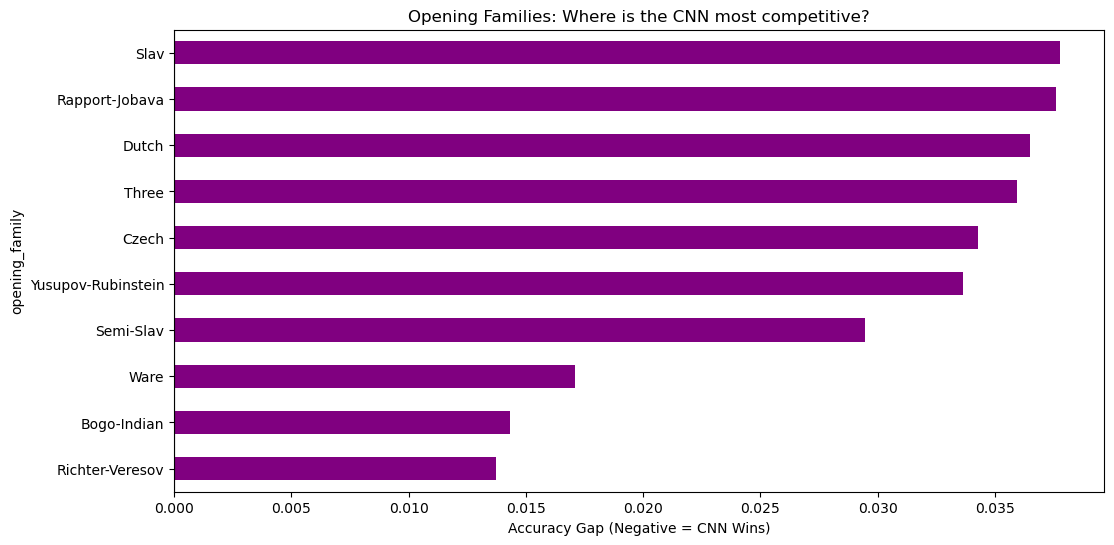

In [13]:
# 1. Clean Opening Tags (Take the first word, e.g., "Sicilian" from "Sicilian Defense...")
puzzles_df['opening_family'] = puzzles_df['OpeningTags'].astype(str).apply(lambda x: x.split('_')[0] if pd.notnull(x) else 'Unknown')

# 2. Filter for common openings (at least 500 puzzles)
top_openings = puzzles_df['opening_family'].value_counts()
common_openings = top_openings[top_openings > 500].index
opening_df = puzzles_df[puzzles_df['opening_family'].isin(common_openings)]

# 3. Calculate Accuracy
opening_stats = opening_df.groupby('opening_family', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
opening_stats['Gap'] = opening_stats['transformer_first_move_correct'] - opening_stats['cnn_first_move_correct']

# 4. Sort by CNN's relative strength (smallest/negative gap)
cnn_strongest_openings = opening_stats.sort_values('Gap').head(10)

print("--- Openings where CNN Rivals the Transformer ---")
display(cnn_strongest_openings)

# Visualize
plt.figure(figsize=(12, 6))
# Plotting the Gap
cnn_strongest_openings['Gap'].plot(kind='barh', color='purple')
plt.axvline(0, color='black')
plt.title('Opening Families: Where is the CNN most competitive?')
plt.xlabel('Accuracy Gap (Negative = CNN Wins)')
plt.show()

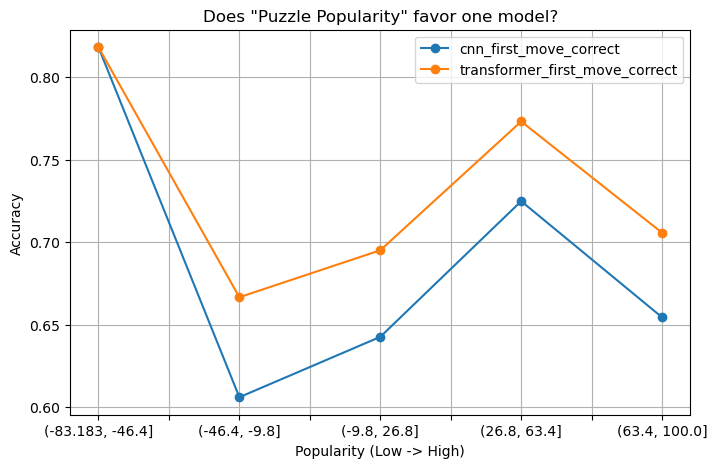

Correlation (Popularity vs CNN Correct):   -0.0095
Correlation (Popularity vs Trans Correct): -0.0075


In [14]:
# Bin popularity (-100 to +100)
puzzles_df['pop_bin'] = pd.cut(puzzles_df['Popularity'], bins=5)

# Calculate accuracy
pop_stats = puzzles_df.groupby('pop_bin', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# Plot
pop_stats.plot(kind='line', marker='o', figsize=(8, 5))
plt.title('Does "Puzzle Popularity" favor one model?')
plt.ylabel('Accuracy')
plt.xlabel('Popularity (Low -> High)')
plt.grid(True)
plt.show()

# Correlation
corr_cnn = puzzles_df['Popularity'].corr(puzzles_df['cnn_first_move_correct'])
corr_trans = puzzles_df['Popularity'].corr(puzzles_df['transformer_first_move_correct'])

print(f"Correlation (Popularity vs CNN Correct):   {corr_cnn:.4f}")
print(f"Correlation (Popularity vs Trans Correct): {corr_trans:.4f}")

--- Performance on Special Rules ---


,cnn_first_move_correct,transformer_first_move_correct,Gap
move_type,,,
Castling,0.623688,0.676006,0.052318
Normal,0.657341,0.708457,0.051116
Promotion,0.828964,0.882731,0.053767


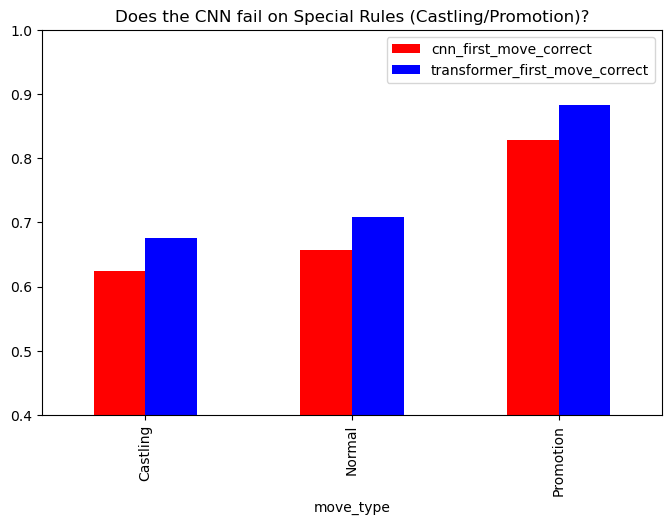

In [15]:
# 1. Define Special Moves based on the Solution String
def get_move_type(moves_str):
    moves = str(moves_str).split()
    first_move = moves[0] if len(moves) > 0 else ""
    
    if len(first_move) == 5 and (first_move[-1] in ['q', 'r', 'b', 'n']):
        return 'Promotion'
    elif first_move == 'e1g1' or first_move == 'e1c1' or first_move == 'e8g8' or first_move == 'e8c8':
        # This is a heuristic; technically these could be non-castling king moves, 
        # but in puzzles they are 99% castling.
        return 'Castling'
    else:
        return 'Normal'

puzzles_df['move_type'] = puzzles_df['Moves'].apply(get_move_type)

# 2. Calculate Accuracy per Type
special_stats = puzzles_df.groupby('move_type', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
special_stats['Gap'] = special_stats['transformer_first_move_correct'] - special_stats['cnn_first_move_correct']

print("--- Performance on Special Rules ---")
display(special_stats)

# 3. Visualize
special_stats[['cnn_first_move_correct', 'transformer_first_move_correct']].plot(kind='bar', figsize=(8, 5), color=['red', 'blue'])
plt.title("Does the CNN fail on Special Rules (Castling/Promotion)?")
plt.ylim(0.4, 1.0)
plt.show()

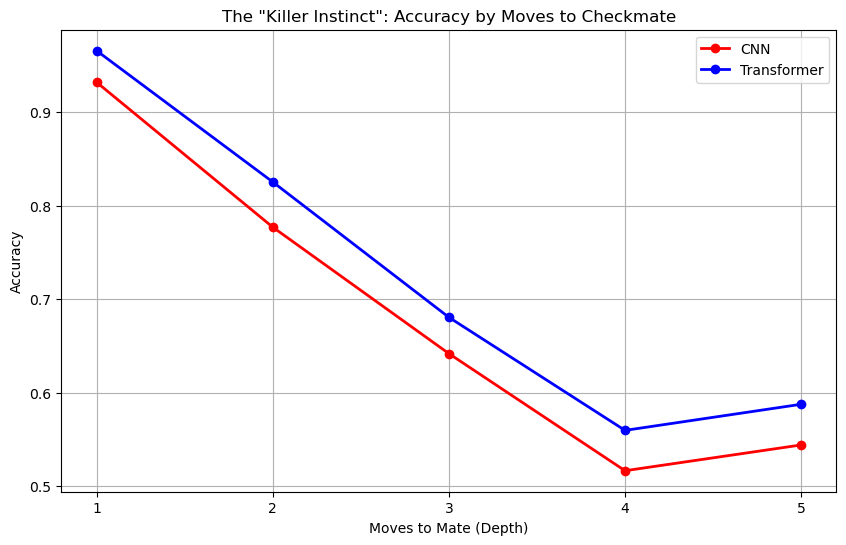

--- Mate Depth Analysis ---


,cnn_first_move_correct,transformer_first_move_correct
mate_depth,,
1.0,0.932197,0.965947
2.0,0.777145,0.825501
3.0,0.641847,0.680665
4.0,0.516513,0.559692
5.0,0.544086,0.587627


In [16]:
# 1. Extract "Mate in X" from Themes
# We look for themes like 'mateIn1', 'mateIn2', etc.
def get_mate_depth(themes_str):
    if not isinstance(themes_str, str):
        return None
    themes = themes_str.split()
    for t in themes:
        if t.startswith('mateIn'):
            # Extract the number (e.g., "mateIn1" -> 1)
            try:
                return int(t.replace('mateIn', ''))
            except:
                pass
    return None

puzzles_df['mate_depth'] = puzzles_df['Themes'].apply(get_mate_depth)

# 2. Filter for depths 1 to 5 (most common)
mate_df = puzzles_df[puzzles_df['mate_depth'].isin([1, 2, 3, 4, 5])]

# 3. Calculate Accuracy
mate_stats = mate_df.groupby('mate_depth')[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()

# 4. Visualize the "Crossover"
plt.figure(figsize=(10, 6))
plt.plot(mate_stats.index, mate_stats['cnn_first_move_correct'], marker='o', label='CNN', color='red', linewidth=2)
plt.plot(mate_stats.index, mate_stats['transformer_first_move_correct'], marker='o', label='Transformer', color='blue', linewidth=2)

plt.title('The "Killer Instinct": Accuracy by Moves to Checkmate')
plt.xlabel('Moves to Mate (Depth)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5])
plt.show()

print("--- Mate Depth Analysis ---")
display(mate_stats)

--- Aggression Profile: Who handles violence better? ---


,cnn_first_move_correct,transformer_first_move_correct,Gap
move_category,,,
Normal,0.661493,0.713778,0.052285
Quiet Move,0.578056,0.603036,0.024981


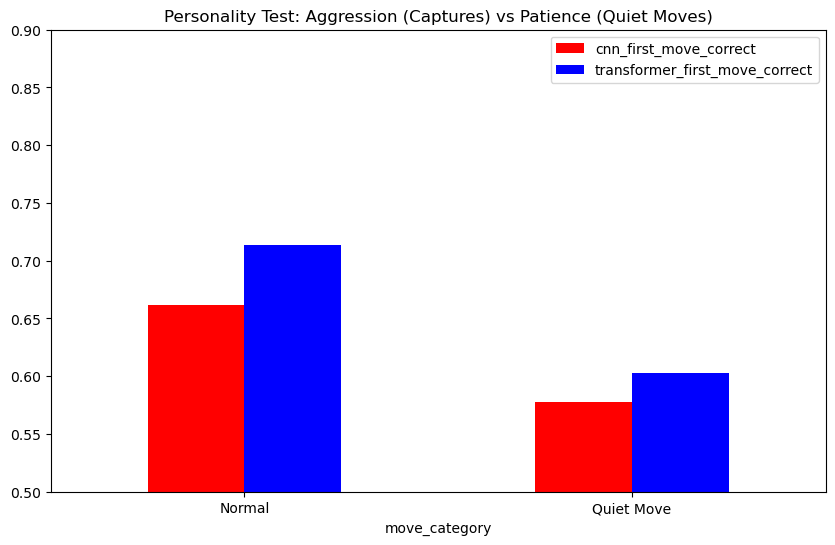

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Classify Move Types (Capture, Check, or Quiet)
def get_move_category(move_san):
    # We need Standard Algebraic Notation (SAN) which has 'x' and '+'
    # If your dataset only has coordinate notation (e1e5), this is harder.
    # Assuming 'Moves' column or similar has the info. 
    # If not, we can infer from the puzzle themes or board state, 
    # but let's check if we can infer "Capture" from the FEN change?
    # Simpler: Puzzles usually have 'crushing' or 'quietMove' in Themes.
    
    if not isinstance(move_san, str): return 'Unknown'
    
    if 'x' in move_san: return 'Capture'
    if '+' in move_san or '#' in move_san: return 'Check/Mate'
    return 'Quiet'

# Alternative: Use "Themes" if your move notation is pure coordinates (e2e4)
# Look for 'capture' or 'quietMove' in the Themes column
def get_theme_category(themes):
    if not isinstance(themes, str): return 'Normal'
    if 'capture' in themes: return 'Capture'
    if 'quietMove' in themes: return 'Quiet Move'
    if 'check' in themes: return 'Check'
    return 'Normal'

puzzles_df['move_category'] = puzzles_df['Themes'].apply(get_theme_category)

# 2. Calculate Accuracy per Category
aggression_stats = puzzles_df.groupby('move_category', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
aggression_stats['Gap'] = aggression_stats['transformer_first_move_correct'] - aggression_stats['cnn_first_move_correct']

print("--- Aggression Profile: Who handles violence better? ---")
display(aggression_stats)

# 3. Visualize
aggression_stats[['cnn_first_move_correct', 'transformer_first_move_correct']].plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title("Personality Test: Aggression (Captures) vs Patience (Quiet Moves)")
plt.ylim(0.5, 0.9)
plt.xticks(rotation=0)
plt.show()

--- Piece Specialization: Does the CNN struggle with Knights? ---


,cnn_first_move_correct,transformer_first_move_correct,Gap
piece_type,,,
Bishop,0.616484,0.637469,0.020985
Knight,0.680797,0.706983,0.026186
Pawn,0.710683,0.711363,0.000680
Queen,0.659740,0.710303,0.050563
Rook,0.660251,0.700457,0.040207


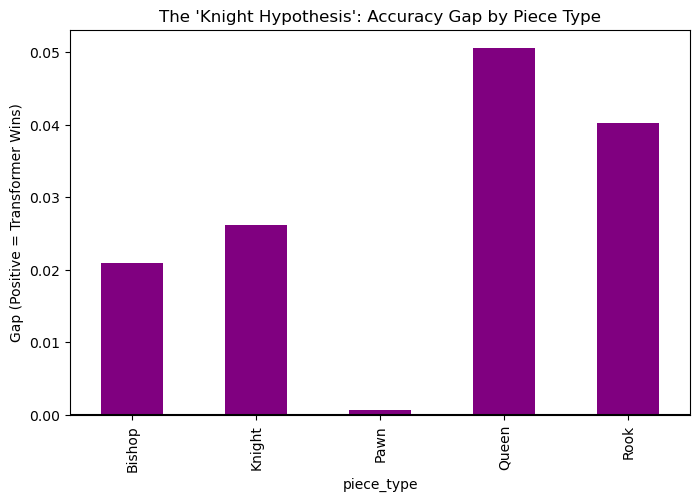

In [18]:
# 1. Identify the Piece being moved
# We need to look at the Board (FEN) and the Move (e.g., e2e4).
# This is tricky without a chess library, but we can do a rough check 
# using the FEN and the starting square of the move.

def get_moved_piece(row):
    try:
        # Parse Move: "e2e4" -> Start "e2"
        move = row['Moves'].split()[0]
        start_sq = move[:2]
        
        # Parse FEN to find what is at "e2"
        # FEN: "rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1"
        # This requires a parser. For speed, let's use a simplified heuristic 
        # or rely on SAN if available (e.g. "Nf3").
        
        # IF YOU DON'T HAVE SAN MOVES, we can skip or use a library.
        # BUT, many puzzle datasets have 'knightEndgame', 'rookEndgame' in Themes.
        # Let's use Themes as a proxy for the *dominant piece*.
        
        themes = str(row['Themes'])
        if 'pawnEndgame' in themes: return 'Pawn'
        if 'knightEndgame' in themes: return 'Knight'
        if 'bishopEndgame' in themes: return 'Bishop'
        if 'rookEndgame' in themes: return 'Rook'
        if 'queenEndgame' in themes: return 'Queen'
        return 'Mixed/Other'
    except:
        return 'Unknown'

puzzles_df['piece_type'] = puzzles_df.apply(get_moved_piece, axis=1)

# 2. Analyze Accuracy
piece_stats = puzzles_df.groupby('piece_type', observed=True)[['cnn_first_move_correct', 'transformer_first_move_correct']].mean()
piece_stats['Gap'] = piece_stats['transformer_first_move_correct'] - piece_stats['cnn_first_move_correct']

# Filter out 'Mixed/Other' to see pure piece endings
clean_piece_stats = piece_stats.drop(['Mixed/Other', 'Unknown'], errors='ignore')

print("--- Piece Specialization: Does the CNN struggle with Knights? ---")
display(clean_piece_stats)

# 3. Visualize
clean_piece_stats['Gap'].plot(kind='bar', color='purple', figsize=(8, 5))
plt.axhline(0, color='black')
plt.title("The 'Knight Hypothesis': Accuracy Gap by Piece Type")
plt.ylabel("Gap (Positive = Transformer Wins)")
plt.show()